# Starbucks and MTA Data

## Problem Statement:
Starbucks is a premier international coffee franchise with over 30,000 locations throughout the world. With New York City being one of the top cities to consume coffee, in all of the United States, Starbucks has imprinted its mark throughout the city, opening up more than 400 stores throughout the 5 boroughs, with 240 being specifically in Manhattan. 

The Metropolitan Transportation Authority (MTA) has become a very viable and popular means of transportation for people in New York City, seamlessly aiding people in getting to various part of the city that may be too far to walk or too expensive to take a taxi/uber to get too. With this means of transportation, thousands of people go through these arrays of turnstiles which leads to greater foot traffic in these general areas at certain times which would make it prime real estate to open up a Starbucks store.  On the other side of the coin, it will also tell us which stores maybe are losing foot traffic and will need to be looked into more to see if there has been a decrease in these stores profit and loss statements which may need to lead to relocation or shut down permanently. With looking at this turnstile data that the MTA provided, can we identify trends happening around certain subway stations that can possibly lead to expansion opportunities as well as mitigate risk with certain stores that aren’t becoming as popular 

We will assess our data with a time series analysis, using historical data of these stations and turnstiles to predict future foot traffic in each of the various locations. We will use the Seasonal Auto Regression Integrated Moving Average Exonginous (SARIMAX) model to evaluate and use regression, specifically Root Mean Squared Error (RMSE), to score our models. 



![](800px-MTA_New_York_City_Subway_logo.svg.png)
![](Starbucks_Corporation_Logo_2011.svg.png)


## Executive Summary

## Table of Contents

- [1.4 Acquiring and Preprocessing Data](#Acquiring-and-Preprocessing-Data)
- [1.5 Data Dictionary](#Data-Dictionary)
- [1.6 Loading Libraries](#Loading-Libraries)
- [1.7 Loading Data](#Loading-Data)
- [1.8 EDA](#EDA)
- [1.9 Featured Engineering](#CFeatured-Engineering)
- [1.10 Model Preparation](#Model-Preparation)
- [1.11 Modeling](#Modeling)
- [1.12 Model Selection](#Model-Selection)
- [1.13 Model Evaluation](#Model-Evaluation)
- [1.14 Conclusion](#Conclusion)
- [1.15 Conclusion](#Conclusion)

## Acquiring and Preprocessing Data

__Talk about other notebook__

## Data Dictionary

|Feature|Type|Description|
|---|---|---|
|**State**|*object*|State|
|**City**|*object*|City|
|**Zip Codes**|*int*|Zip Code |
|**Latitude**|*float*|Latitude |
|**Longitude**|*float*|Longitude|
|**ID**|*object*|Unique ID of each Data point|
|**Name**|*object*|Store/Restaurant Name|
|**Review Count**|*int*|Number of reviews
|**Categories**|*object*|Category of each point|
|**Rating**|*float*|Average rating of each point|
|**Price**|*int*|Amount of $ signs of each point|
|**High Value**|*float*|Average Adjusted Gross Income of people who made over 200,000 per Zip Code|
|**AGI Sum**|*float*|Sum of the Total Average Income per threshold per Zip Code|
|**Aff Perc**|*float*|Rate of Affluency per Zip Code (High Value /AGI Sum)|
|**Count**|*int*|Count of Restaurants in particular Zip Code|


## Loading Libraries 

In [1407]:
#cleaning libraries
import requests
import pandas as pd
import numpy as np
from PIL import Image
from difflib import get_close_matches 
#evaluation
import statsmodels.api as sm
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX 

#graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading Data

Load the stations CSV we created in the Starbucks Cleaning notebook

In [1305]:
stations = pd.read_csv('Data/stations.csv')
stations.head()

,Station_Latitude,Station_Longitude,Route_8,Route_9,Route_10,Route_11,ADA,Free_Crossover,Latitude,Longitude,station,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
0,40.740893,-74.001690,NaN,NaN,NaN,NaN,1.0,1.0,40.740612,-74.001896,14th St,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
1,40.745906,-73.998041,NaN,NaN,NaN,NaN,0.0,1.0,40.745990,-73.997927,23rd St,0.003181,24th & 7th,0.003717,19th & 8th,0.003729,23rd & 1st
2,40.747846,-73.946000,NaN,NaN,NaN,NaN,0.0,1.0,40.747807,-73.945829,23rd St-Ely Av,0.013156,Roosevelt Island,0.021601,69th & First,0.023777,75th & First
3,40.752287,-73.993391,NaN,NaN,NaN,NaN,1.0,1.0,40.752218,-64.744260,34th St,0.001281,"Penn Station by A,C,E",0.001281,One Penn Plaza,0.003779,32nd btwn 6th & 7th
4,40.757308,-73.989735,1.0,2.0,3.0,7.0,1.0,1.0,40.757358,-73.989816,42nd St,0.000612,42nd & 8th,0.000680,Union Square East,0.001043,43rd & 8th


Load in the 2017 Turnstile data that we were able to obtain from the MTA website

In [1359]:
df_2017 = pd.read_csv('Data/turnstile-usage-data-2017.csv')


In [1360]:
df_2017.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,23:00:00,REGULAR,6455787,2184977
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,19:00:00,REGULAR,6455505,2184926
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,15:00:00,REGULAR,6454819,2184867
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,11:00:00,REGULAR,6454437,2184773
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-12-22T00:00:00.000,07:00:00,REGULAR,6454285,2184501


## Preliminary EDA

Within the Preliminary EDA, we will setup one Dataframe that will be used to start feature engineering and setting up various graphs to look at

In [920]:
df_2017.isnull().sum()

C/A                                                           0
Unit                                                          0
SCP                                                           0
Station                                                       0
Line Name                                                     0
Division                                                      0
Date                                                          0
Time                                                          0
Description                                                   0
Entries                                                       0
Exits                                                         0
dtype: int64

In [923]:
len(df_2017['Line Name'])

8880000

In [924]:
df_2017['Line Name'].unique()

array(['NQR456W', 'NQRW', 'ACENQRS1237W', 'BDFMNQRW', 'NRW', 'LNQR456W',
       'JNQRZ6W', 'RNW', 'R1W', 'FJMZ', 'JZ', 'JZ456', 'ACJZ2345', 'BQ',
       'S', 'S2345', 'BQS', 'Q', 'R2345', 'R', 'BDNQR', 'BDNQR2345',
       'DFGMNR', 'DNR', 'N', 'ND', 'D', 'DFNQ', 'ACEL', 'FLM123', 'L',
       'LG', 'LM', 'JMZ', 'JM', 'J', 'A', 'E', 'M', 'AC1', 'C', 'ABCD',
       'BC', 'ACBD', 'ABCD1', 'ACENGRS1237W', 'ACE', 'CE', 'ABCDEFM',
       'ACE23', '2345ACJZ', 'AC', 'ACF', 'ACG', 'ACS', 'ACJLZ', 'AS',
       'BD', 'BD4', 'BDE', 'EM', 'EM6', 'EMG', 'EMR', 'MR', 'EFMR7',
       'EFMR', 'EF', 'F', 'G', 'GL', 'BDFM', 'BDFM7', 'FM', 'BDFQ6', 'FG',
       '1', 1, '1RW', '23', '123', '123FLM', 123, '1237ACENQRSW', '1ABCD',
       45], dtype=object)

In [1067]:
df_2017['Station'].sort_values().unique()

array(['1 AV', '103 ST', '104 ST', '111 ST', '116 ST', '121 ST', '125 ST',
       '135 ST', '14 ST', '14 ST-UNION SQ', '145 ST', '14TH STREET',
       '15 ST-PROSPECT', '155 ST', '157 ST', '161/YANKEE STAD',
       '163 ST-AMSTERDM', '167 ST', '168 ST', '169 ST', '170 ST',
       '174-175 STS', '175 ST', '18 AV', '18 ST', '181 ST', '182-183 STS',
       '190 ST', '2 AV', '20 AV', '21 ST', '23 ST', '25 AV', '25 ST',
       '28 ST', '3 AV', '34 ST-HERALD SQ', '34 ST-PENN STA', '36 ST',
       '4 AV-9 ST', '42 ST-BRYANT PK', '42 ST-PORT AUTH', '45 ST',
       '46 ST', '47-50 STS ROCK', '49 ST', '4AV-9 ST', '5 AV/53 ST',
       '5 AV/59 ST', '50 ST', '53 ST', '55 ST', '57 ST', '57 ST-7 AV',
       '59 ST', '59 ST COLUMBUS', '6 AV', '63 DR-REGO PARK',
       '66 ST-LINCOLN', '67 AV', '7 AV', '71 ST', '72 ST', '72 ST-2 AVE',
       '75 AV', '75 ST-ELDERTS', '77 ST', '79 ST', '8 AV', '8 ST-NYU',
       '80 ST', '81 ST-MUSEUM', '85 ST-FOREST PK', '86 ST', '86 ST-2 AVE',
       '88 ST', '9 AV',

In [1361]:
df_2017 = df_2017[(df_2017['Line Name']!= 1) & (df_2017['Line Name']!= 123) & (df_2017['Line Name']!= 45)]


In [1364]:
df_2017[df_2017['Station'] == '36 ST']

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
981006,C018,R197,00-00-00,36 ST,DNR,BMT,2017-12-22T00:00:00.000,20:00:00,REGULAR,4282030,5630855
981007,C018,R197,00-00-00,36 ST,DNR,BMT,2017-12-22T00:00:00.000,16:00:00,REGULAR,4281582,5630259
981008,C018,R197,00-00-00,36 ST,DNR,BMT,2017-12-22T00:00:00.000,12:00:00,REGULAR,4280810,5629623
981009,C018,R197,00-00-00,36 ST,DNR,BMT,2017-12-22T00:00:00.000,08:00:00,REGULAR,4280276,5629013
981010,C018,R197,00-00-00,36 ST,DNR,BMT,2017-12-22T00:00:00.000,04:00:00,REGULAR,4279889,5628753
...,...,...,...,...,...,...,...,...,...,...,...
3486861,N312,R339,00-06-00,36 ST,MR,IND,2016-12-31T00:00:00.000,16:00:00,REGULAR,69299,43786
3486862,N312,R339,00-06-00,36 ST,MR,IND,2016-12-31T00:00:00.000,12:00:00,REGULAR,69245,43736
3486863,N312,R339,00-06-00,36 ST,MR,IND,2016-12-31T00:00:00.000,08:00:00,REGULAR,69232,43722
3486864,N312,R339,00-06-00,36 ST,MR,IND,2016-12-31T00:00:00.000,04:00:00,REGULAR,69226,43713


In [1362]:
df_2017.loc[df_2017["Station"] == "50 ST","Line Name"]= df_2017.loc[df_2017["Station"] == "50 ST","Line Name"].replace('D', 'E')

In [1075]:
df_e = df_2017.loc[df_2017['Line Name'].str.contains('E'),:]

In [1076]:
df_e['Station'].sort_values().unique()

array(['14 ST', '23 ST', '34 ST-PENN STA', '42 ST-PORT AUTH',
       '5 AV/53 ST', '50 ST', '7 AV', '75 AV', '8 AV', 'BRIARWOOD',
       'CANAL ST', 'CHAMBERS ST', 'COURT SQ', 'COURT SQ-23 ST',
       'FOREST HILLS 71', 'JFK JAMAICA CT1', 'JKSN HT-ROOSVLT',
       'KEW GARDENS', 'LEXINGTON AV/53', 'QUEENS PLAZA', 'SPRING ST',
       'TIMES SQ-42 ST', 'W 4 ST-WASH SQ', 'WORLD TRADE CTR'],
      dtype=object)

In [1077]:
len(df_e)

890571

In [1078]:
del(df_2017)

In [1079]:
def date_manip(df):
    new_date = [i.split('T')[0] for i in df['Date']]
    df['Date'] = new_date
    df['date_time'] = pd.to_datetime(df.Date + ' ' + df.Time)
    return df.head()

In [1080]:
date_manip(df_e)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,date_time
118432,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,23:00:00,REGULAR,7357995,8791810,2017-12-22 23:00:00
118433,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,19:00:00,REGULAR,7357446,8791371,2017-12-22 19:00:00
118434,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,15:00:00,REGULAR,7356450,8790311,2017-12-22 15:00:00
118435,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,11:00:00,REGULAR,7355728,8789251,2017-12-22 11:00:00
118436,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,07:00:00,REGULAR,7355235,8787730,2017-12-22 07:00:00


In [1081]:
def doy(day):
    return day.day_name()

In [1082]:
def moy(month):
    return month.month_name()

In [1083]:
def map_day_to_df(df):
    df['day'] = df['date_time'].map(doy)
    return df.head()

In [1084]:
def map_month_to_df(df):
    df['month'] = df['date_time'].map(moy)
    return df.head()

In [1085]:
map_day_to_df(df_e)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,date_time,day
118432,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,23:00:00,REGULAR,7357995,8791810,2017-12-22 23:00:00,Friday
118433,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,19:00:00,REGULAR,7357446,8791371,2017-12-22 19:00:00,Friday
118434,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,15:00:00,REGULAR,7356450,8790311,2017-12-22 15:00:00,Friday
118435,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,11:00:00,REGULAR,7355728,8789251,2017-12-22 11:00:00,Friday
118436,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,07:00:00,REGULAR,7355235,8787730,2017-12-22 07:00:00,Friday


In [1086]:
map_month_to_df(df_e)

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,date_time,day,month
118432,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,23:00:00,REGULAR,7357995,8791810,2017-12-22 23:00:00,Friday,December
118433,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,19:00:00,REGULAR,7357446,8791371,2017-12-22 19:00:00,Friday,December
118434,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,15:00:00,REGULAR,7356450,8790311,2017-12-22 15:00:00,Friday,December
118435,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,11:00:00,REGULAR,7355728,8789251,2017-12-22 11:00:00,Friday,December
118436,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,07:00:00,REGULAR,7355235,8787730,2017-12-22 07:00:00,Friday,December


In [1306]:
stations['station'] = stations['station'].str.upper()

In [1307]:
stations.head()

,Station_Latitude,Station_Longitude,Route_8,Route_9,Route_10,Route_11,ADA,Free_Crossover,Latitude,Longitude,station,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
0,40.740893,-74.001690,NaN,NaN,NaN,NaN,1.0,1.0,40.740612,-74.001896,14TH ST,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
1,40.745906,-73.998041,NaN,NaN,NaN,NaN,0.0,1.0,40.745990,-73.997927,23RD ST,0.003181,24th & 7th,0.003717,19th & 8th,0.003729,23rd & 1st
2,40.747846,-73.946000,NaN,NaN,NaN,NaN,0.0,1.0,40.747807,-73.945829,23RD ST-ELY AV,0.013156,Roosevelt Island,0.021601,69th & First,0.023777,75th & First
3,40.752287,-73.993391,NaN,NaN,NaN,NaN,1.0,1.0,40.752218,-64.744260,34TH ST,0.001281,"Penn Station by A,C,E",0.001281,One Penn Plaza,0.003779,32nd btwn 6th & 7th
4,40.757308,-73.989735,1.0,2.0,3.0,7.0,1.0,1.0,40.757358,-73.989816,42ND ST,0.000612,42nd & 8th,0.000680,Union Square East,0.001043,43rd & 8th


The next step we had to take was to find a way to merge now our two station data sets together, one with the station locations and closest starbucks and the other with the turnstile info. For that, we needed to get teh station names to match up together. We had to make a conversion dictionary that would then be mapped to our station location dataframe as a means of merging them together. With the help of the get_close_matches fucntion. this expediated the process for us to search within the unique values of the turnstile dataframe to match the closest named station which did work at about a 75% clip. The other 25% where it wasnt able to indentify, we had to mannually go through the list to figure out the matching station.

In [1308]:
from difflib import SequenceMatcher,get_close_matches

SequenceMatcher(None,'Prospect Park' , 'PROSPECT PARK').ratio()

0.23076923076923078

In [1309]:
stations['station'].sort_values().unique()

array(['14TH ST', '23RD ST', '23RD ST-ELY AV', '34TH ST', '42ND ST',
       '45 RD-COURT HOUSE SQ', '50TH ST', '51ST ST', '5TH AV-53RD ST',
       '75TH AV', '7TH AV', '8TH AV', 'BROADWAY-74TH ST', 'CANAL ST',
       'CHAMBERS ST', 'FOREST HILLS-71ST AV',
       'JACKSON HEIGHTS-ROOSEVELT AVE', 'JAMAICA-VAN WYCK',
       'KEW GARDENS-UNION TURNPIKE', 'LEXINGTON AV-53RD ST', 'PARK PLACE',
       'PARSONS BLVD-ARCHER AV - JAMAICA CENTER', 'QUEENS PLAZA',
       'SPRING ST', 'SUTPHIN BLVD-ARCHER AV - JFK', 'TIMES SQUARE',
       'TIMES SQUARE-42ND ST', 'WEST 4TH ST', 'WORLD TRADE CENTER'],
      dtype=object)

In [1310]:
df_e['Station'].sort_values().unique()

array(['14 ST', '23 ST', '34 ST-PENN STA', '42 ST-PORT AUTH',
       '5 AV/53 ST', '50 ST', '7 AV', '75 AV', '8 AV', 'BRIARWOOD',
       'CANAL ST', 'CHAMBERS ST', 'COURT SQ', 'COURT SQ-23 ST',
       'FOREST HILLS 71', 'JFK JAMAICA CT1', 'JKSN HT-ROOSVLT',
       'KEW GARDENS', 'LEXINGTON AV/53', 'QUEENS PLAZA', 'SPRING ST',
       'TIMES SQ-42 ST', 'W 4 ST-WASH SQ', 'WORLD TRADE CTR'],
      dtype=object)

In [1311]:
get_close_matches('TIMES SQUARE-42ND ST' ,stations['station'].unique(), n=5)

['TIMES SQUARE-42ND ST', 'TIMES SQUARE']

This above is an example of how the get_close_matches function worked. This was run with all the unique values we had in the df_e dataframe to match the values in the df dataframe.

In [1312]:
conv_station_dict = {
    'TIMES SQUARE-42ND ST': 'TIMES SQ-42 ST', 
    '8TH AV': '8 AV', 
    'SUTPHIN BLVD-ARCHER AV - JFK':'JFK JAMAICA CT1', 
    '42ND ST': '42 ST-PORT AUTH',
    '34TH ST': '34 ST-PENN STA', 
    '23RD ST':'23 ST', 
    '14TH ST':'14 ST', 
    'WEST 4TH ST': 'W 4 ST-WASH SQ', 
    'SPRING ST': 'SPRING ST',
    'CANAL ST': 'CANAL ST', 
    'CHAMBERS ST': 'CHAMBERS ST', 
    'WORLD TRADE CENTER': 'WORLD TRADE CTR', 
    '7TH AV': '7 AV', 
    '5TH AV-53RD ST': '5 AV/53 ST',
    'LEXINGTON AV-53RD ST': 'LEXINGTON AV/53', 
    '45 RD-COURT HOUSE SQ': 'COURT SQ-23 ST', 
    'QUEENS PLAZA': 'QUEENS PLAZA',
    'JACKSON HEIGHTS-ROOSEVELT AVE': 'JKSN HT-ROOSVLT', 
    'FOREST HILLS-71ST AV': 'FOREST HILLS 71', 
    '75TH AV': '75 AV', 
    'KEW GARDENS-UNION TURNPIKE':'KEW GARDENS',
    'JAMAICA-VAN WYCK': 'BRIARWOOD', 
    '50TH ST' : '50 ST'
}

stations['station'] = stations['station'].map(conv_station_dict)

In [1313]:
stations['station'].unique()

array(['14 ST', '23 ST', nan, '34 ST-PENN STA', '42 ST-PORT AUTH',
       'COURT SQ-23 ST', '50 ST', '5 AV/53 ST', '75 AV', '7 AV', '8 AV',
       'CANAL ST', 'CHAMBERS ST', 'FOREST HILLS 71', 'JKSN HT-ROOSVLT',
       'BRIARWOOD', 'KEW GARDENS', 'LEXINGTON AV/53', 'QUEENS PLAZA',
       'SPRING ST', 'JFK JAMAICA CT1', 'TIMES SQ-42 ST', 'W 4 ST-WASH SQ',
       'WORLD TRADE CTR'], dtype=object)

In [1314]:
temp_stations = stations.dropna(axis=0, subset=['station'])

In [1315]:
temp_stations.head()

,Station_Latitude,Station_Longitude,Route_8,Route_9,Route_10,Route_11,ADA,Free_Crossover,Latitude,Longitude,station,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
0,40.740893,-74.001690,NaN,NaN,NaN,NaN,1.0,1.0,40.740612,-74.001896,14 ST,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
1,40.745906,-73.998041,NaN,NaN,NaN,NaN,0.0,1.0,40.745990,-73.997927,23 ST,0.003181,24th & 7th,0.003717,19th & 8th,0.003729,23rd & 1st
3,40.752287,-73.993391,NaN,NaN,NaN,NaN,1.0,1.0,40.752218,-64.744260,34 ST-PENN STA,0.001281,"Penn Station by A,C,E",0.001281,One Penn Plaza,0.003779,32nd btwn 6th & 7th
4,40.757308,-73.989735,1.0,2.0,3.0,7.0,1.0,1.0,40.757358,-73.989816,42 ST-PORT AUTH,0.000612,42nd & 8th,0.000680,Union Square East,0.001043,43rd & 8th
5,40.747023,-73.945264,NaN,NaN,NaN,NaN,0.0,1.0,40.746223,-73.945461,COURT SQ-23 ST,0.014239,Roosevelt Island,0.022691,69th & First,0.023533,35th Ave and 37th St


In [1316]:
temp_stations = temp_stations[['station', 'Station_Latitude', 'Station_Longitude', 'first_closest', 'first_closest_store', 'second_closest', 'second_closest_store', 'third_closest', 'third_closest_store']]

In [1317]:
temp_stations.rename(columns = {'station': 'Station'}, inplace = True)

In [1318]:
temp_stations[temp_stations['Station'] == 'W 4 ST-WASH SQ']

,Station,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
27,W 4 ST-WASH SQ,40.732338,-74.000495,0.002392,7th Ave at Grove Street,0.002569,239 Bleecker St,0.005055,New York University


In [1319]:
df_merged =  pd.merge(left = df_e,
        right = temp_stations,
        how ='inner',
        on = 'Station')

In [1320]:
df_merged.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     ',
       'date_time', 'day', 'month', 'Station_Latitude', 'Station_Longitude',
       'first_closest', 'first_closest_store', 'second_closest',
       'second_closest_store', 'third_closest', 'third_closest_store'],
      dtype='object')

In [1321]:
df_merged.rename(columns = {'Exits                                                     ': 'Exits'}, inplace = True)

In [1322]:
df_merged = df_merged.set_index(['date_time'])

In [1323]:
df_merged.sort_index(inplace = True, ascending = False)

In [1324]:
df_merged.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,...,day,month,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
date_time,,,,,,,,,,,,,,,,,,,,,
2017-12-22 23:00:00,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-12-22,23:00:00,REGULAR,7357995,...,Friday,December,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th
2017-12-22 23:00:00,N092,R029,03-03-01,CHAMBERS ST,ACE23,IND,2017-12-22,23:00:00,REGULAR,51957,...,Friday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str
2017-12-22 23:00:00,N092,R029,03-00-05,CHAMBERS ST,ACE23,IND,2017-12-22,23:00:00,REGULAR,2344966,...,Friday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str
2017-12-22 23:00:00,R151,R033,00-00-07,TIMES SQ-42 ST,1237ACENQRSW,IRT,2017-12-22,23:00:00,REGULAR,1245589,...,Friday,December,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th
2017-12-22 23:00:00,N092,R029,03-00-04,CHAMBERS ST,ACE23,IND,2017-12-22,23:00:00,REGULAR,10378155,...,Friday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str


For some locations, Starbucks is open 24 hours a day. However, normal operations for Starbucks during the week are between 07:00 AM – 11:00 PM. Since most of Starbucks business comes in during the morning time as their primary source of business is coffee, we will filter out the hours to 06:00 AM - 12:00PM.


In [1325]:
df_merged.between_time('06:00:00', '12:00:00')

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,...,day,month,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store
date_time,,,,,,,,,,,,,,,,,,,,,
2017-12-22 12:00:00,N078,R175,01-00-01,14 ST,ACEL,IND,2017-12-22,12:00:00,REGULAR,557480,...,Friday,December,40.740893,-74.001690,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
2017-12-22 12:00:00,N333B,R141,02-00-01,FOREST HILLS 71,EFMR,IND,2017-12-22,12:00:00,REGULAR,1449764,...,Friday,December,40.721691,-73.844521,0.001279,107-12 Continental Avenue,0.002948,7000 Austin Street,0.009394,Queens Blvd & 67th Rd
2017-12-22 12:00:00,N078,R175,01-00-01,14 ST,ACEL,IND,2017-12-22,12:00:00,REGULAR,557480,...,Friday,December,40.740893,-74.001690,0.001861,8th Ave just south of 14th St,0.002499,19th & 8th,0.003523,Greenwich Ave at Bank St
2017-12-22 12:00:00,N309A,R140,00-03-00,QUEENS PLAZA,EMR,IND,2017-12-22,12:00:00,REGULAR,97648,...,Friday,December,40.748973,-73.937243,0.015421,35th Ave and 37th St,0.017912,31-01 Broadway,0.018468,Roosevelt Island
2017-12-22 12:00:00,JFK03,R536,00-00-01,JFK JAMAICA CT1,E,IND,2017-12-22,12:00:00,REGULAR,110230,...,Friday,December,40.700486,-73.807969,0.003170,89th Ave & Sutphin Blvd.,0.027711,118-24 Queens Blvd,0.028819,St. John's University - Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 07:00:00,N067,R012,00-03-05,34 ST-PENN STA,ACE,IND,2016-12-31,07:00:00,REGULAR,4236992,...,Saturday,December,40.752287,-73.993391,0.001281,"Penn Station by A,C,E",0.001281,One Penn Plaza,0.003779,32nd btwn 6th & 7th
2016-12-31 07:00:00,N092,R029,03-00-02,CHAMBERS ST,ACE23,IND,2016-12-31,07:00:00,REGULAR,12629825,...,Saturday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str
2016-12-31 07:00:00,N091,R029,02-00-01,CHAMBERS ST,ACE23,IND,2016-12-31,07:00:00,REGULAR,5992116,...,Saturday,December,40.714111,-74.008585,0.000759,Church Street & Murray,0.001266,Chambers and West Broadway,0.001697,Broadway at Barclay Str


In [1326]:
df_merged.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits', 'day', 'month',
       'Station_Latitude', 'Station_Longitude', 'first_closest',
       'first_closest_store', 'second_closest', 'second_closest_store',
       'third_closest', 'third_closest_store'],
      dtype='object')

In [1327]:
df_merged.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits', 'day', 'month',
       'Station_Latitude', 'Station_Longitude', 'first_closest',
       'first_closest_store', 'second_closest', 'second_closest_store',
       'third_closest', 'third_closest_store'],
      dtype='object')

In [1328]:
df= (df_merged.groupby(['C/A', 'Unit', 'SCP', 'Station','Line Name', 'Division', 'Date','month', 'day', 'Station_Latitude', 'Station_Longitude', 'first_closest',
                   'first_closest_store','second_closest', 'second_closest_store','third_closest',
                   'third_closest_store'])['Entries'].max() 
 - df_merged.groupby(['C/A', 'Unit', 'SCP', 'Station','Line Name', 'Division','Date','month', 'day', 'Station_Latitude', 'Station_Longitude','first_closest',
                     'first_closest_store','second_closest', 'second_closest_store','third_closest',
                     'third_closest_store'])['Entries'].min()).reset_index()




In [1329]:
exits = (df_merged.groupby(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division','Date','month', 'day', 'first_closest',
                   'first_closest_store','second_closest', 'second_closest_store','third_closest',
                   'third_closest_store'])['Exits'].max() 
 - df_merged.groupby(['C/A', 'Unit', 'SCP', 'Station','Line Name', 'Division','Date','month', 'day','first_closest',
                     'first_closest_store','second_closest', 'second_closest_store','third_closest',
                     'third_closest_store'])['Exits'].min()).reset_index()




In [1330]:
exits.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,month,day,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Exits
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2016-12-31,December,Saturday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1607
1,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-01,January,Sunday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1568
2,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-02,January,Monday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1808
3,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-03,January,Tuesday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3895
4,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-04,January,Wednesday,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,4108


In [1331]:
df['Exits'] = exits['Exits']

In [1332]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2016-12-31,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607
1,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-01,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568
2,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-02,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808
3,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-03,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895
4,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2017-01-04,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108


In [1333]:
df.dtypes

C/A                      object
Unit                     object
SCP                      object
Station                  object
Line Name                object
Division                 object
Date                     object
month                    object
day                      object
Station_Latitude        float64
Station_Longitude       float64
first_closest           float64
first_closest_store      object
second_closest          float64
second_closest_store     object
third_closest           float64
third_closest_store      object
Entries                   int64
Exits                     int64
dtype: object

In [1334]:
df['Date'] = pd.to_datetime(df['Date'])

In [1335]:
df.dtypes

C/A                             object
Unit                            object
SCP                             object
Station                         object
Line Name                       object
Division                        object
Date                    datetime64[ns]
month                           object
day                             object
Station_Latitude               float64
Station_Longitude              float64
first_closest                  float64
first_closest_store             object
second_closest                 float64
second_closest_store            object
third_closest                  float64
third_closest_store             object
Entries                          int64
Exits                            int64
dtype: object

In [1336]:
df = df.set_index(['Date'])

In [1337]:
df['Entries'].sort_values().tail(20)

Date
2017-12-19       5379758
2017-06-22       5449929
2017-12-01       8224299
2017-07-04       8266473
2017-11-30      11007391
2017-09-27      11781823
2017-03-02      14180769
2017-07-23      16594428
2017-09-01      21566536
2017-03-06      36107735
2017-03-07      36110538
2017-01-08      50330602
2017-01-03      66562129
2017-03-07      99848623
2017-01-09     117440381
2017-06-17     150102672
2017-08-27     735329800
2017-01-26    1153072639
2017-08-09    1211446878
2017-12-19    1579485694
Name: Entries, dtype: int64

In [1338]:
df = df[(df['Entries'] < 30000) & (df['Entries'] < 30000) ]

In [1339]:
df['Entries'].sort_values().tail(20)

Date
2017-07-15     7294
2017-07-15     7591
2017-07-08     7609
2017-07-15     7641
2017-08-07     7799
2017-08-01     8177
2017-08-09     8259
2017-08-08     8318
2017-07-08     8440
2017-08-04     8607
2017-08-03     8615
2017-08-10     8721
2017-10-15    13783
2017-06-15    17058
2017-12-19    18945
2017-09-19    22133
2017-08-26    23347
2017-10-22    29355
2017-04-12    29581
2017-09-30    29697
Name: Entries, dtype: int64

In [1340]:
(df['Exits'].sort_values().tail(20))

Date
2017-02-28     9783
2017-10-15     9800
2017-12-14     9833
2017-03-03     9833
2017-02-03     9842
2017-04-25     9849
2017-02-17     9875
2017-03-02     9904
2017-02-13    10003
2017-08-07    10027
2017-11-10    10104
2017-12-15    10191
2017-02-16    10204
2017-11-07    10954
2017-09-19    11514
2017-10-22    15716
2017-06-15    22306
2017-08-26    32009
2017-04-12    34678
2017-09-30    38249
Name: Exits, dtype: int64

In [1341]:
df = df[(df['Exits'] < 30000) & (df['Exits'] < 30000) ]

In [1342]:
df['Exits'].sort_values().tail(20)

Date
2017-02-14     9690
2017-11-30     9709
2017-11-17     9716
2017-02-28     9783
2017-10-15     9800
2017-12-14     9833
2017-03-03     9833
2017-02-03     9842
2017-04-25     9849
2017-02-17     9875
2017-03-02     9904
2017-02-13    10003
2017-08-07    10027
2017-11-10    10104
2017-12-15    10191
2017-02-16    10204
2017-11-07    10954
2017-09-19    11514
2017-10-22    15716
2017-06-15    22306
Name: Exits, dtype: int64

In [1343]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits
Date,,,,,,,,,,,,,,,,,,
2016-12-31,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607
2017-01-01,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568
2017-01-02,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808
2017-01-03,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895
2017-01-04,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108


In [1344]:
df.describe()

,Station_Latitude,Station_Longitude,first_closest,second_closest,third_closest,Entries,Exits
count,113675.000000,113675.000000,113675.000000,113675.000000,113675.000000,113675.000000,113675.000000
mean,40.741380,-73.957838,0.003676,0.005937,0.007486,1123.900163,920.364724
std,0.018615,0.060424,0.006662,0.008731,0.009356,1001.653783,1090.153688
min,40.700486,-74.009781,0.000381,0.000680,0.001043,0.000000,0.000000
25%,40.721691,-73.993391,0.000759,0.001281,0.001915,348.000000,182.000000
50%,40.748973,-73.986754,0.001279,0.001827,0.003136,918.000000,587.000000
75%,40.757308,-73.937243,0.002392,0.003717,0.009394,1645.000000,1197.000000
max,40.762862,-73.807969,0.030072,0.033464,0.035837,29355.000000,22306.000000


## Featured Engineering 

In [1345]:
df['total_turns'] = df['Entries'] + df['Exits']

In [1346]:
df['avg_distance'] = df['first_closest'] * df['second_closest'] * df['third_closest']

## Graph EDA

In [1347]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,,,,,,,,,,,,
2016-12-31,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607,2229,5.150430e-09
2017-01-01,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568,2335,5.150430e-09
2017-01-02,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808,3000,5.150430e-09
2017-01-03,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895,7088,5.150430e-09
2017-01-04,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108,7232,5.150430e-09


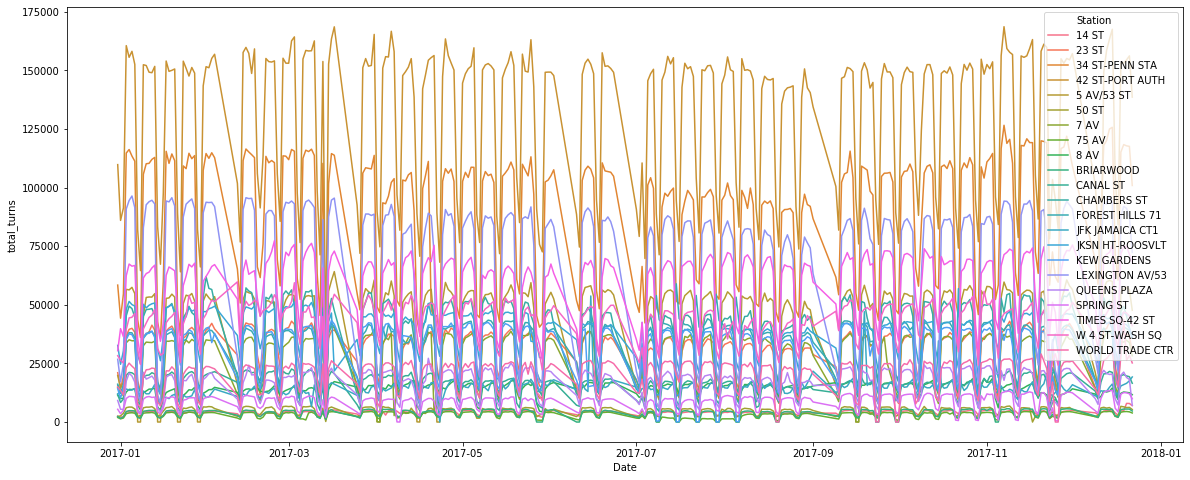

In [1348]:
plt.figure(figsize=(20, 8))
sns.lineplot(x =temp.index, y = temp.total_turns, hue = temp.Station)

In [1349]:
len(df.groupby(['Station'])['total_turns'].sum())

23

In [1350]:
stations_names = df['Station'].sort_values().unique()
stations_names

array(['14 ST', '23 ST', '34 ST-PENN STA', '42 ST-PORT AUTH',
       '5 AV/53 ST', '50 ST', '7 AV', '75 AV', '8 AV', 'BRIARWOOD',
       'CANAL ST', 'CHAMBERS ST', 'COURT SQ-23 ST', 'FOREST HILLS 71',
       'JFK JAMAICA CT1', 'JKSN HT-ROOSVLT', 'KEW GARDENS',
       'LEXINGTON AV/53', 'QUEENS PLAZA', 'SPRING ST', 'TIMES SQ-42 ST',
       'W 4 ST-WASH SQ', 'WORLD TRADE CTR'], dtype=object)

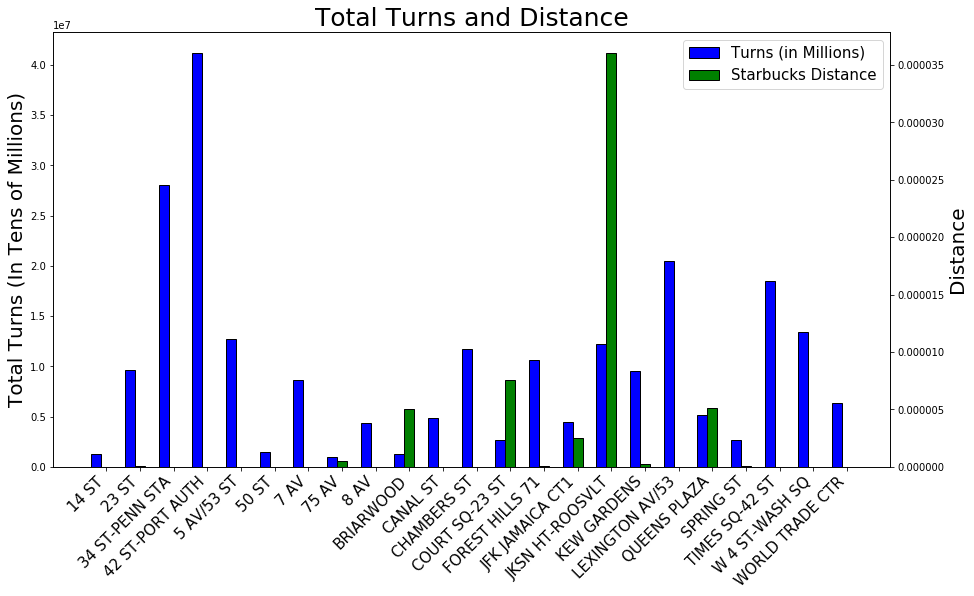

In [1463]:
# Have two sets of data we want to plot
bars1 = df.groupby(['Station'])['total_turns'].sum()
bars2 = df.groupby(['Station'])['avg_distance'].mean()

# arange x values to be plotted
b1 = np.arange(len(bars1))
b2 = [x + barWidth for x in b1]
b3 = b1+b2 

#Set up Graph
fig = plt.figure(figsize = (15,8))
ax = plt.subplot(111)
barWidth = 0.3

# Create Total Turns bar
ax.bar(b1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Turns (in Millions)')
plt.xticks([r + barWidth for r in range(len(b3))], stations_names, rotation=45,fontsize = 15)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.yticks(fontsize = 10)
plt.ylabel('Total Turns (In Tens of Millions)', fontsize = 20)
# Create Starbucks Distance
ax2 = ax.twinx()
ax2.bar(b2, bars2, width = barWidth, color = 'green', edgecolor = 'black', capsize=7, label='Starbucks Distance')
plt.ylabel('Distance', fontsize = 20)

plt.title("Total Turns and Distance",  fontsize= 25)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0, fontsize = 15)

plt.show()


In [1371]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December']

In [1381]:
reversed(months)

In [1379]:
df.groupby(['month'])['total_turns'].sum()[months]


month
January      21842140
February     16262044
March        18537504
April        21421738
May          23309987
June         12249956
July         21177476
August       22071261
September    16811844
October      23453017
November     22986653
December     12258191
Name: total_turns, dtype: int64

Text(0, 0.5, 'Month')

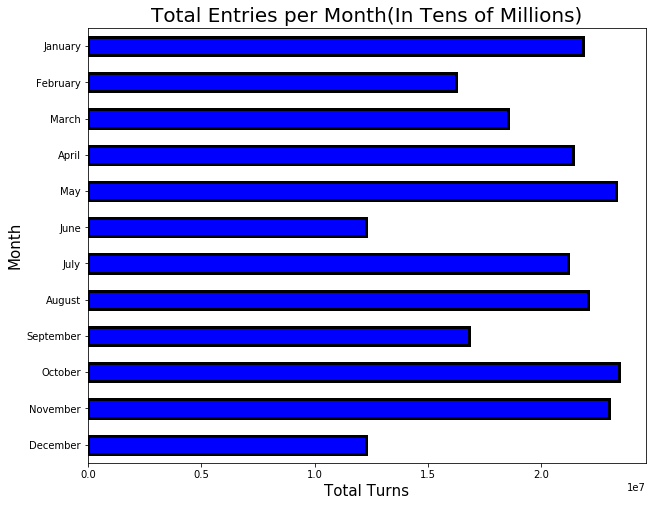

In [1382]:
plt.figure(figsize=(10, 8))

df.groupby(['month'])['total_turns'].sum()[reversed(months)].plot(kind = 'barh', colors = 'blue', edgecolor='black',
                                                               linewidth='3')
plt.title('Total Entries per Month(In Tens of Millions)',fontsize = 20)
plt.xlabel('Total Turns', fontsize = 15)
plt.ylabel('Month',fontsize = 15)


In [1383]:
day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']

Text(0, 0.5, 'day')

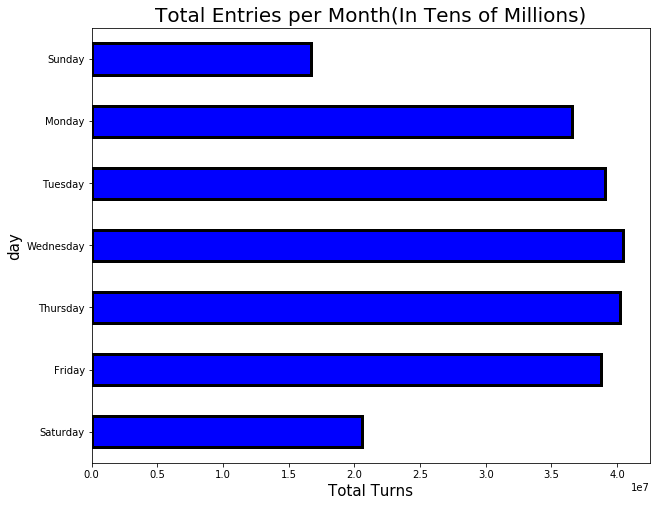

In [1385]:
plt.figure(figsize=(10, 8))

df.groupby(['day'])['total_turns'].sum()[reversed(day)].plot(kind = 'barh', colors = 'blue', edgecolor='black',
                                                               linewidth='3')
plt.title('Total Entries per Month(In Tens of Millions)',fontsize = 20)
plt.xlabel('Total Turns', fontsize = 15)
plt.ylabel('day',fontsize = 15)

In [1354]:
fol = df.groupby('Station').mean().reset_index()
fol2 = df.groupby('Station').sum().reset_index()
fol.head()

,Station,Station_Latitude,Station_Longitude,first_closest,second_closest,third_closest,Entries,Exits,total_turns,avg_distance
0,14 ST,40.740893,-74.001690,0.001861,0.002499,0.003523,1586.097179,2408.758621,3994.855799,1.638377e-08
1,23 ST,40.745906,-73.998041,0.003181,0.003717,0.003729,1204.652737,833.162919,2037.815655,4.408462e-08
2,34 ST-PENN STA,40.752287,-73.993391,0.001281,0.001281,0.003779,1136.768325,1082.399700,2219.168024,6.205325e-09
3,42 ST-PORT AUTH,40.757308,-73.989735,0.000612,0.000680,0.001043,1587.264095,1140.270447,2727.534542,4.339208e-10
4,5 AV/53 ST,40.760167,-73.975224,0.001516,0.001719,0.001915,909.374301,1011.256085,1920.630385,4.990736e-09


In [1355]:
lat = [coors for coors in fol['Station_Latitude']]
long = [coors for coors in fol['Station_Longitude']]
coors = (pd.DataFrame({'lat': lat,'long':long}))
points = list(zip(coors['lat'], coors['long']))

In [1387]:
m = folium.Map(location=[40.693943, -73.985880], default_zoom_start=10)

for i in range(0,len(fol)):
    folium.Circle(
        location=[fol.iloc[i]['Station_Latitude'], fol.iloc[i]['Station_Longitude']],
        popup=fol.iloc[i]['Station'],
        radius=fol2.iloc[i]['total_turns']/90000,
        color='crimson',
        fill=True,
        fill_color='crimson'
   ).add_to(m)
    folium.Marker(
        location=[fol.iloc[i]['Station_Latitude'], fol.iloc[i]['Station_Longitude']],
        popup=fol.iloc[i]['Station'],
        tooltip = "Station"
   ).add_to(m)
    
m

http://web.mta.info/nyct/service/eline.htm

### Port Authority

In [1217]:
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,month,day,Station_Latitude,Station_Longitude,first_closest,first_closest_store,second_closest,second_closest_store,third_closest,third_closest_store,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,,,,,,,,,,,,
2016-12-31,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,December,Saturday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,622,1607,2229,5.150430e-09
2017-01-01,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Sunday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,767,1568,2335,5.150430e-09
2017-01-02,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Monday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,1192,1808,3000,5.150430e-09
2017-01-03,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Tuesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3193,3895,7088,5.150430e-09
2017-01-04,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,January,Wednesday,40.754672,-73.986754,0.001214,42nd btwn 3rd & Lex,0.001846,39th & 7th,0.002298,Broadway Btwn 37th & 38th,3124,4108,7232,5.150430e-09


In [1419]:
port = df[df['Station'] == '42 ST-PORT AUTH']

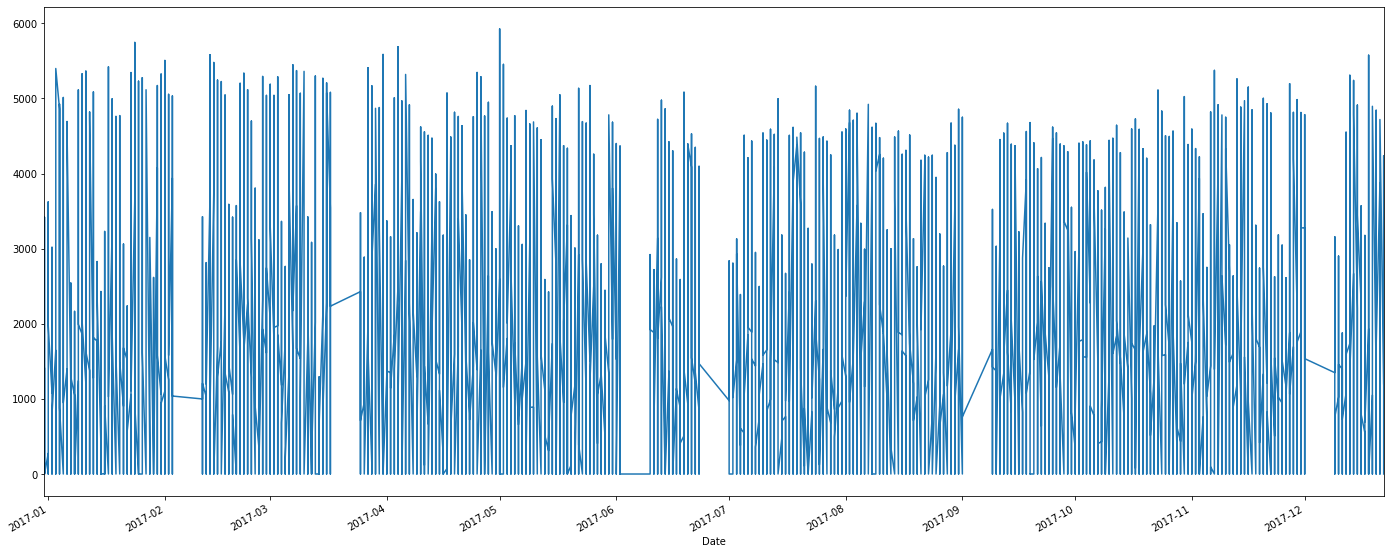

In [1420]:
plt.figure(figsize=(24,10))
port['Entries'].plot()

Text(0, 0.5, 'Day of Week')

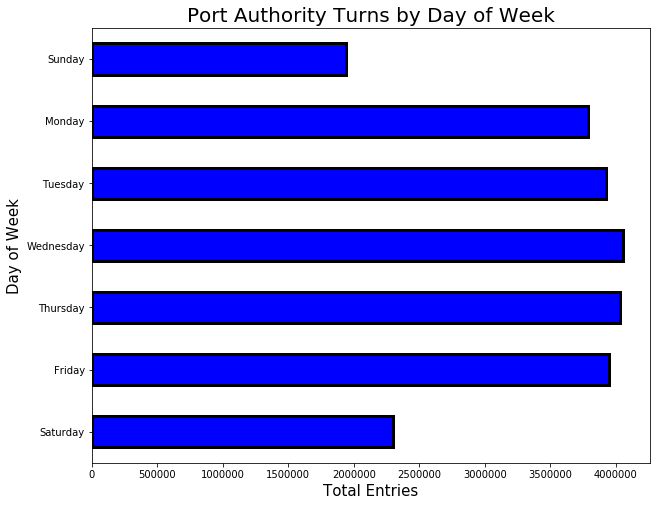

In [1421]:
plt.figure(figsize=(10, 8))
port.groupby('day')['Entries'].sum()[reversed(day)].plot(kind = 'barh', colors = 'blue', edgecolor='black',
                                                               linewidth='3')
plt.title('Port Authority Turns by Day of Week', fontsize = 20)
plt.xlabel('Total Entries', fontsize = 15)
plt.ylabel('Day of Week', fontsize = 15)

In [1422]:
port1 = df.loc[df['Station'] == '42 ST-PORT AUTH',:].groupby('Date').sum()

In [1423]:
port1

,Station_Latitude,Station_Longitude,first_closest,second_closest,third_closest,Entries,Exits,total_turns,avg_distance
Date,,,,,,,,,
2016-12-31,1997.108092,-3625.497015,0.029978,0.033334,0.051087,64566,45238,109804,2.126212e-08
2017-01-01,1997.108092,-3625.497015,0.029978,0.033334,0.051087,48202,37811,86013,2.126212e-08
2017-01-02,1997.108092,-3625.497015,0.029978,0.033334,0.051087,53122,38180,91302,2.126212e-08
2017-01-03,1997.108092,-3625.497015,0.029978,0.033334,0.051087,95763,64798,160561,2.126212e-08
2017-01-04,1997.108092,-3625.497015,0.029978,0.033334,0.051087,93185,62397,155582,2.126212e-08
...,...,...,...,...,...,...,...,...,...
2017-12-18,1956.350784,-3551.507280,0.029366,0.032653,0.050044,91165,61849,153014,2.082820e-08
2017-12-19,1956.350784,-3551.507280,0.029366,0.032653,0.050044,90191,62946,153137,2.082820e-08
2017-12-20,1956.350784,-3551.507280,0.029366,0.032653,0.050044,90403,64067,154470,2.082820e-08


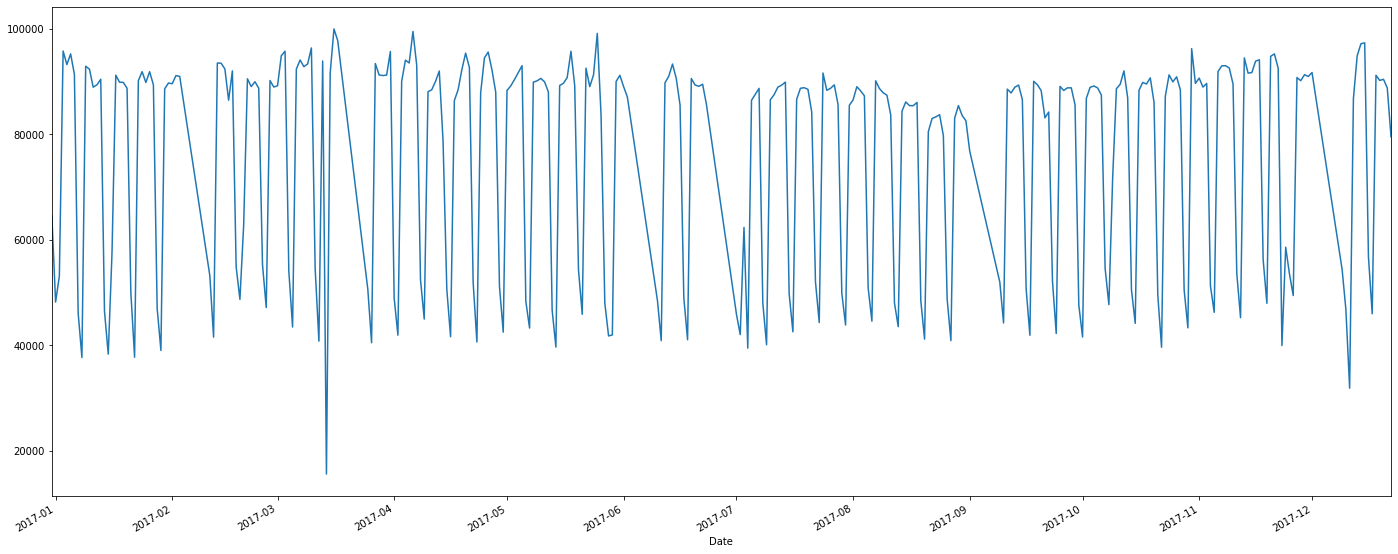

In [1424]:
plt.figure(figsize=(24,10))
port1['Entries'].plot()

In [1425]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18, rotation = 45);

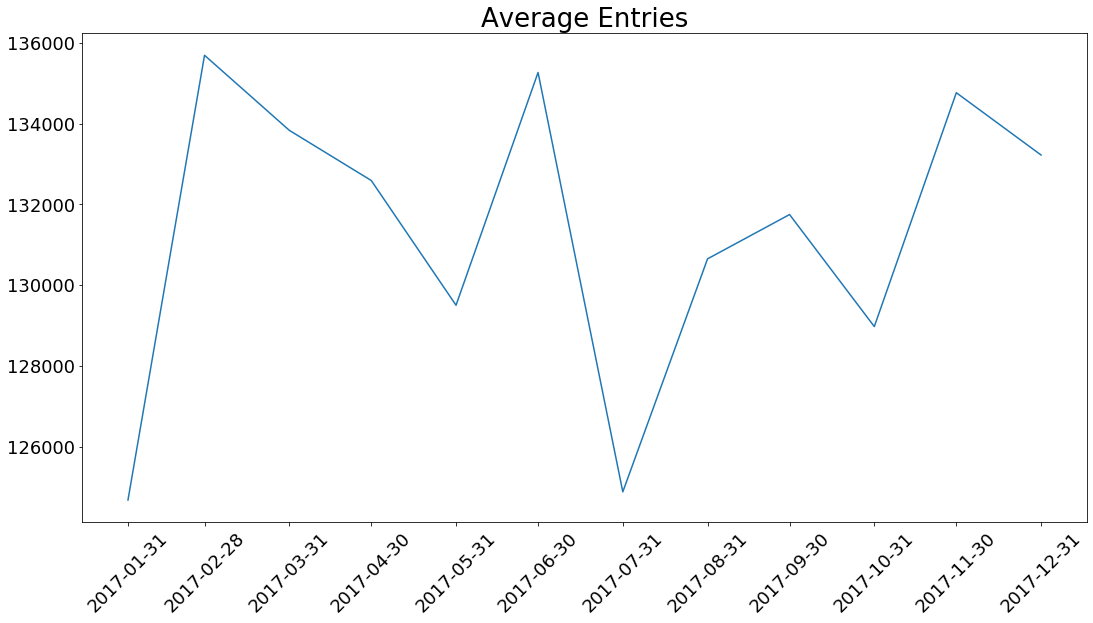

In [1426]:
plot_series(port1.resample('M', closed = 'left').mean(),
            ['total_turns'],
            title = 'Average Entries',
            steps = 1)

In [1427]:
port1['rolling_week_turns'] = port1['total_turns'].rolling(7).mean()
port1['rolling_month_turns'] = port1['total_turns'].rolling(30).mean()
port1['rolling_quarter_turns'] = port1['total_turns'].rolling(91).mean()

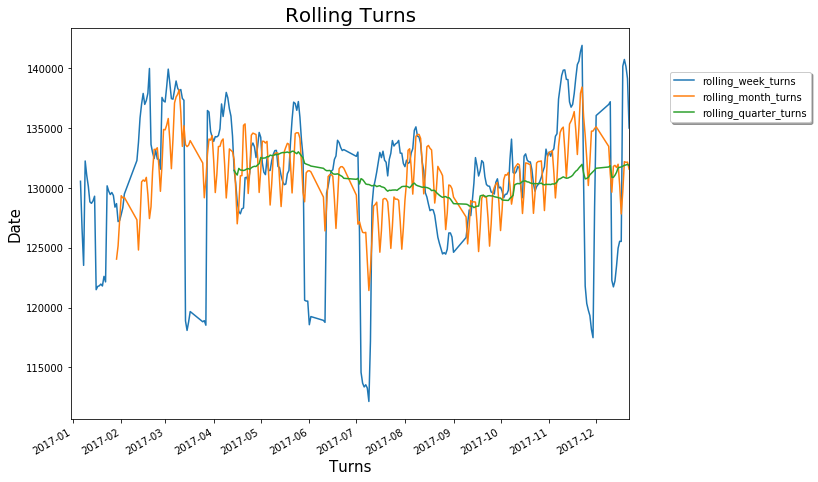

In [1428]:
plt.figure(figsize = (10,8))
port1['rolling_week_turns'].plot()
port1['rolling_month_turns'].plot()
port1['rolling_quarter_turns'].plot()
plt.title('Rolling Turns', fontsize = 20)
plt.xlabel('Turns', fontsize = 15)
plt.ylabel('Date', fontsize = 15)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, .9), shadow=True, ncol=1);

In [1429]:
port1 = port1.resample('M', closed = 'left').mean()

In [1430]:
port1['auto_1_week'] = port1['total_turns'].shift(1)
port1['auto_1_month'] = port1['total_turns'].shift(4)
port1['auto_1_year'] = port1['total_turns'].shift(52)

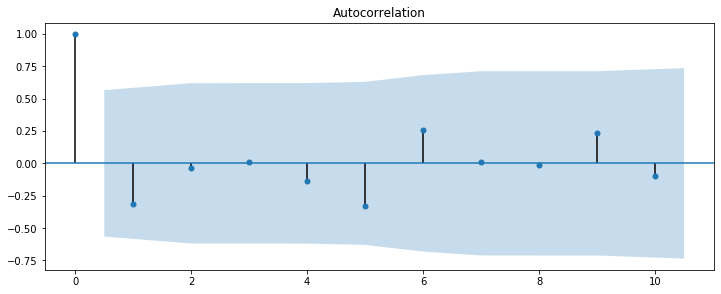

In [1434]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(port1['total_turns'], lags=10, ax=ax1);

In [1435]:
port1[['total_turns','auto_1_week', 'auto_1_month', 'auto_1_year']].corr()

,total_turns,auto_1_week,auto_1_month,auto_1_year
total_turns,1.000000,-0.376222,-0.211937,NaN
auto_1_week,-0.376222,1.000000,0.001135,NaN
auto_1_month,-0.211937,0.001135,1.000000,NaN
auto_1_year,NaN,NaN,NaN,NaN


In [1436]:
print(f'Autocorrelation between Total Turns and 1-lag Total Turns: {round(port1["total_turns"].autocorr(lag=1),4)}')
print(f'Autocorrelation between Total Turns and 2-lag Total Turns: {round(port1["total_turns"].autocorr(lag=2),4)}')
print(f'Autocorrelation between Total Turns and 52-lag Total Turns: {round(port1["total_turns"].autocorr(lag=52),4)}')

Autocorrelation between Total Turns and 1-lag Total Turns: -0.3762
Autocorrelation between Total Turns and 2-lag Total Turns: -0.042
Autocorrelation between Total Turns and 52-lag Total Turns: nan


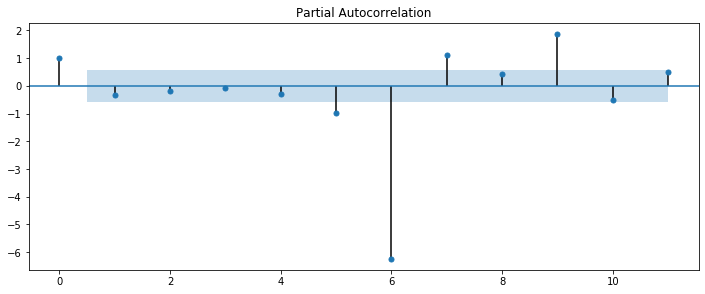

In [1444]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_pacf(port1['total_turns'], lags=12, ax=ax1);

## Modelings

For our modeling stage, we are going to look to fit an ARIMA as well as an SARIMAX model to judge on.

In [1438]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [1445]:
interpret_dftest(adfuller(port1['total_turns']))

Test Statistic   -2.784475
p-value           0.060526
dtype: float64

In [1454]:
port1['total_turns_diff1'] = port1['total_turns'].diff(1)

In [1456]:
port1['total_turns_diff1'].dropna(inplace = True)

In [1457]:
interpret_dftest(adfuller(port1['total_turns_diff1']))

Test Statistic   -4.089659
p-value           0.001007
dtype: float64

In [1458]:
train, test = train_test_split(port1['total_turns_diff1'], test_size = 0.25, shuffle = False)

In [1459]:
def train_test_plot(train, test):
    plt.figure(figsize=(16, 8))
    plt.plot(train, c='blue')
    plt.plot(test, c='orange');

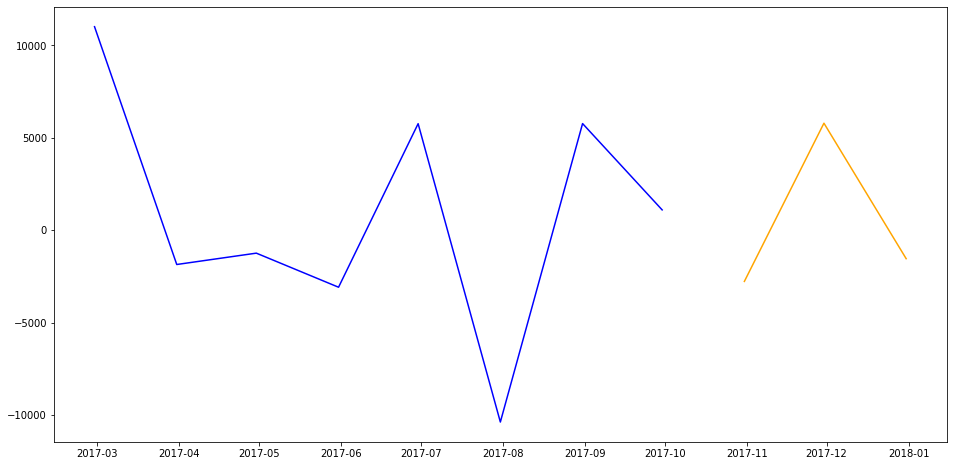

In [1460]:
train_test_plot(train, test)

In [1461]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0
# Use nested for loop to iterate over values of p and q.
for p in range (5):
    for q in range (5):
        

        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p}, 1, {q}) Model')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = train.astype(float).dropna(),  ##endog = y - variable
                         order = (p, 1, q))
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0, 1, 0) Model
The AIC for ARIMA(0,1,0) is: 153.54369868498344
Attempting to fit ARIMA(0, 1, 1) Model
The AIC for ARIMA(0,1,1) is: 150.7297128818371
Attempting to fit ARIMA(0, 1, 2) Model
Attempting to fit ARIMA(0, 1, 3) Model
Attempting to fit ARIMA(0, 1, 4) Model
Attempting to fit ARIMA(1, 1, 0) Model
The AIC for ARIMA(1,1,0) is: 151.15820813724702
Attempting to fit ARIMA(1, 1, 1) Model
The AIC for ARIMA(1,1,1) is: 151.18146083319195
Attempting to fit ARIMA(1, 1, 2) Model
Attempting to fit ARIMA(1, 1, 3) Model
Attempting to fit ARIMA(1, 1, 4) Model
Attempting to fit ARIMA(2, 1, 0) Model
The AIC for ARIMA(2,1,0) is: 152.33109862529165
Attempting to fit ARIMA(2, 1, 1) Model
The AIC for ARIMA(2,1,1) is: 152.42855770295222
Attempting to fit ARIMA(2, 1, 2) Model
Attempting to fit ARIMA(2, 1, 3) Model
Attempting to fit ARIMA(2, 1, 4) Model
Attempting to fit ARIMA(3, 1, 0) Model
Attempting to fit ARIMA(3, 1, 1) Model
The AIC for ARIMA(3,1,1) is: 158.59247525587
Attem

In [ ]:
arima0_1_1 = ARIMA

Arima - Total turns
SARIMAX - orry about after 

augment problem statement -> after x amount of turns, this is the time that another store can open

BAr